<a href="https://colab.research.google.com/github/Dalstrino/Desafio-TelecomX-Parte-2/blob/main/TelecomX_Parte_2_Dieggo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

Importa as bibliotecas necessárias.

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# 🛠️ Preparação dos Dados

#### Extração do Arquivo Tratado

Carregua o arquivo CSV que contém os dados tratados anteriormente.

In [292]:
url = ('https://raw.githubusercontent.com/Dalstrino/Desafio-TelecomX-Parte-2/refs/heads/main/dados_tratados.csv')

dadosTratados = pd.read_csv(url)

display(dadosTratados)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


#### Remoção de Colunas Irrelevantes

Elimina colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [293]:
dadosTratados = dadosTratados.drop(columns=['customerID'])
dadosTratados = dadosTratados.drop(columns=['Total.Day'])

#### Prepara em binarios

Adapta os valores da tabela que possui informações redundantes como nas resposta onde tem:
> Sim, Não e Não possui internet

In [294]:
dadosTratados.apply(lambda x: x.unique())

,0
Churn,"[No, Yes]"
customer.gender,"[Female, Male]"
customer.SeniorCitizen,"[0, 1]"
customer.Partner,"[Yes, No]"
customer.Dependents,"[Yes, No]"
customer.tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone.PhoneService,"[Yes, No]"
phone.MultipleLines,"[No, Yes, No phone service]"
internet.InternetService,"[DSL, Fiber optic, No]"
internet.OnlineSecurity,"[No, Yes, No internet service]"


Lista as colunas onde deve ser substituido e realiza a troca

In [295]:
colunasInternet = [
    "internet.OnlineSecurity",
    "internet.OnlineBackup",
    "internet.DeviceProtection",
    "internet.TechSupport",
    "internet.StreamingTV",
    "internet.StreamingMovies"
]
colunasTelefone = [
    "phone.MultipleLines"
]

dadosTratados[colunasInternet] = dadosTratados[colunasInternet].replace("No internet service", "No")
dadosTratados[colunasTelefone] = dadosTratados[colunasTelefone].replace("No phone service", "No")
dadosTratados.apply(lambda x: x.unique())

,0
Churn,"[No, Yes]"
customer.gender,"[Female, Male]"
customer.SeniorCitizen,"[0, 1]"
customer.Partner,"[Yes, No]"
customer.Dependents,"[Yes, No]"
customer.tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone.PhoneService,"[Yes, No]"
phone.MultipleLines,"[No, Yes]"
internet.InternetService,"[DSL, Fiber optic, No]"
internet.OnlineSecurity,"[No, Yes]"


#### Encoding

Transforma as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o one-hot encoding.

In [296]:
colunaCategorica = [
      'Churn', 'customer.gender', 'customer.Partner',
      'customer.Dependents', 'phone.PhoneService',
      'phone.MultipleLines', 'internet.InternetService',
      'internet.OnlineSecurity', 'internet.OnlineBackup',
      'internet.DeviceProtection', 'internet.TechSupport',
      'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
      'account.PaperlessBilling', 'account.PaymentMethod'
]

dadosEnconded = pd.get_dummies(dadosTratados, columns=colunaCategorica, drop_first=True)

dadosEnconded

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.60,593.30,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,False,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,True,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,True,True,True,False,True,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,False,True,True,True,True,False,...,True,True,False,True,False,True,False,False,False,True


In [297]:
dadosEnconded = dadosEnconded.dropna()
dadosEnconded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0
phone.MultipleLines_Yes,0


#### Verificação da Proporção de Evasão

Calcula a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalia se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [298]:
dadosTratados['Churn'].value_counts()
dadosProporcao = (dadosTratados['Churn'].value_counts() /
                          len(dadosTratados)) * 100

print("Proporção de evasão:")
for index, value in dadosProporcao.items():
  print(f"{index} {value:.2f}%")

Proporção de evasão:
No 73.46%
Yes 26.54%


# 🎯 Correlação e Seleção de Variáveis

#### Análise de Correlação

Visualiza a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

account.Charges.Monthly    0.192858
customer.SeniorCitizen     0.150541
account.Charges.Total     -0.199484
customer.tenure           -0.354049
dtype: float64


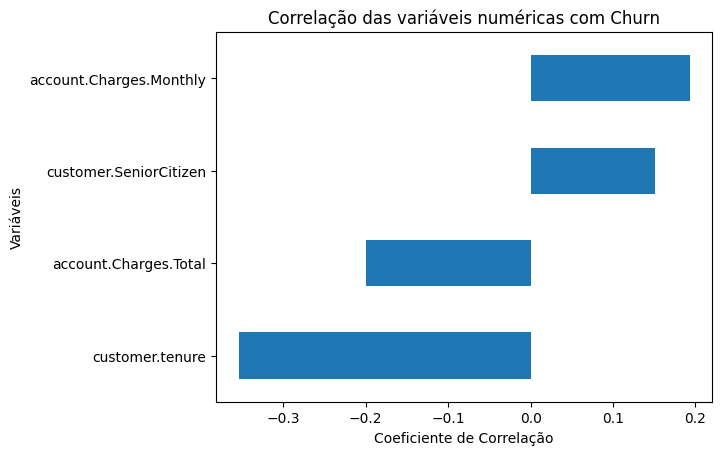

In [299]:
y = dadosEnconded["Churn_Yes"]
X = dadosEnconded.drop(columns=["Churn_Yes"])
X_num = X.select_dtypes(include=['int64', 'float64'])
corr_with_churn = X_num.corrwith(y)

print(corr_with_churn.sort_values(ascending=False))
corr_with_churn.sort_values().plot(kind='barh')
plt.title("Correlação das variáveis numéricas com Churn")
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("Variáveis")
plt.show()

#### Análises Direcionadas

Investiga como variáveis específicas se relacionam com a evasão, como:

Tempo de contrato × Evasão

Total gasto × Evasão

In [300]:
def get_contract_type(row):
    if row['account.Contract_One year']:
        return 'Yearly'
    elif row['account.Contract_Two year']:
        return 'Biyearly'
    else:
        return 'Monthly'

dadosEnconded['account.Contract'] = dadosEnconded.apply(get_contract_type, axis=1)
churnContrato = dadosEnconded.groupby(['account.Contract', 'Churn_Yes']).size().reset_index(name='Quantidade')
totalTipoContrato = churnContrato.groupby('account.Contract')['Quantidade'].transform('sum')
churnContrato['Percentual'] = churnContrato['Quantidade'] / totalTipoContrato * 100

print("Taxa de Churn por Tipo de Contrato:")
print(churnContrato)

Taxa de Churn por Tipo de Contrato:
  account.Contract  Churn_Yes  Quantidade  Percentual
0         Biyearly      False        1637   97.151335
1         Biyearly       True          48    2.848665
2          Monthly      False        2220   57.290323
3          Monthly       True        1655   42.709677
4           Yearly      False        1306   88.722826
5           Yearly       True         166   11.277174


/tmp/ipython-input-419726812.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [301]:
figChurnContrato = px.bar(
    churnContrato,
    x='account.Contract',
    y='Percentual',
    color='Churn_Yes',
    color_discrete_map={False: 'green', True: 'red'},
    labels={
        'Tipo_Contrato': 'Tipo de Contrato',
        'Percentual': 'Percentual (%)',
        'Cancelou_Sim': 'Churn (Cancelamento)'
    },
    title='Taxa de Churn por Tipo de Contrato na Telecom X',
    text=churnContrato['Percentual'].apply(lambda x: f'{x:.1f}%')
)
figChurnContrato.update_layout(barmode='stack', yaxis=dict(ticksuffix='%'), bargap=0.5)
figChurnContrato.show()

# 🤖 Modelagem Preditiva

#### Separação de Dados

Divide o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print("Tamanho treino : ", X_train.shape)
print("Tamanho teste : ", X_test.shape)

Tamanho treino :  (4922, 23)
Tamanho teste :  (2110, 23)


### Criação de Modelos

Criado pelo menos dois modelos diferentes para prever a evasão de clientes.

#### Regressão Linear

In [303]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistica_ml = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=40)
forest_ml = RandomForestClassifier(n_estimators=300, random_state=40)

logistica_ml.fit(X_train, y_train)
forest_ml.fit(X_train, y_train)

print("Machine Learning aplicada com sucesso!")

Machine Learning aplicada com sucesso!


#### Random Forest

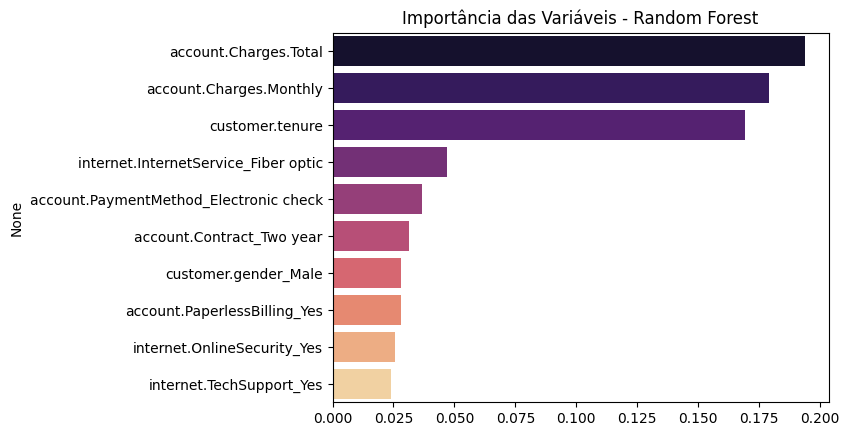

account.Charges.Total                     0.193725
account.Charges.Monthly                   0.178820
customer.tenure                           0.169089
internet.InternetService_Fiber optic      0.047082
account.PaymentMethod_Electronic check    0.036683
account.Contract_Two year                 0.031261
customer.gender_Male                      0.028251
account.PaperlessBilling_Yes              0.027925
internet.OnlineSecurity_Yes               0.025817
internet.TechSupport_Yes                  0.023792
dtype: float64


In [304]:
top = pd.Series(forest_ml.feature_importances_, index=X.columns).nlargest(10)
sns.barplot(x=top.values, y=top.index, hue=top.index, palette="magma", dodge=False, legend=False)
plt.title("Importância das Variáveis - Random Forest")
plt.show()

print(top)

### Avaliação dos Modelos

Avalie cada modelo utilizando as seguintes métricas:

* Acurácia
* Precisão
* Recall
* F1-score
* Matriz de confusão

In [305]:
def avalia_ml(modelo, X_test, y_test, nome):
    y_pred = modelo.predict(X_test)
    print(f"--- Avaliação do modelo: {nome} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, zero_division=0))
    print("F1-score:", f1_score(y_test, y_pred, zero_division=0))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))

avalia_ml(logistica_ml, X_test, y_test, "Regressão Logística\n\n")
avalia_ml(forest_ml, X_test, y_test, "Random Forest\n\n")

--- Avaliação do modelo: Regressão Logística

 ---
Accuracy: 0.7990521327014218
Precision: 0.6388308977035491
Recall: 0.5493716337522442
F1-score: 0.5907335907335908
Matriz de Confusão:
 [[1380  173]
 [ 251  306]]
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1553
        True       0.64      0.55      0.59       557

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

--- Avaliação do modelo: Random Forest

 ---
Accuracy: 0.7962085308056872
Precision: 0.6371490280777538
Recall: 0.5296229802513465
F1-score: 0.5784313725490197
Matriz de Confusão:
 [[1385  168]
 [ 262  295]]
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1553
        True       0.64      0.53      0.58       557

    accuracy                           0.80      2110
   macro avg       0.74      0.71

# 📋  Interpretação e Conclusões

### Análise de Importância das Variáveis

#### Regressão

  - O modelo não fornece coeficientes explícitos, pois sua decisão é baseada em proximidade no espaço das variáveis.

  - Entretanto, o desempenho sugere que variáveis normalizadas e contínuas como *tenure* e *MonthlyCharges* tiveram maior impacto, já que influenciam diretamente as distâncias.

  - Como consequência, clientes com baixa fidelidade (*tenure baixo*) e contas altas tendem a ser classificados como *churn*.

#### Random Forest

As variaveis mais importantes foram: <br>
* account.Charges.Total                     
* account.Charges.Monthly                   
* customer.tenure                         
* internet.InternetService_Fiber optic      
* account.PaymentMethod_Electronic check    

Isso indica que o histórico do cliente (tempo e gastos) e o tipo de contrato/serviço são os determinantes mais fortes para prever a evasão.

### Conclusão

Fatores que elevam/diminuem o Churn:
- Contratos mensais ===> maior risco de churn.
- Baixo tempo de permanência.
- Alta cobrança mensal.
- Serviços adicionais aumentam retenção.

O que recomendar ?
- Incentivar contratos de longo prazo.
- Programas de fidelidade.
- Ajustar preços e pacotes com mais serviços.
- Beneficiar serviços extras.

Melhorias:
* Reduzir a evasão, aumentar a satisfação dos clientes.
* Clientes podem permanecer fiéis no médio e longo prazo.